<a href="https://colab.research.google.com/github/justlikethatHwan/Python/blob/main/240118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
# 확률
import pandas as pd
import numpy as np

In [252]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [253]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [254]:
fish_input =fish[['Weight','Length','Diagonal','Diagonal','Width']]
fish_target = fish['Species'].to_numpy()

In [255]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=2)

In [256]:
test_input.__len__()

40

In [257]:
# 표준점수 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [258]:
#KNN모델
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=3)

In [259]:
kn.score(train_scaled,train_target)

0.8487394957983193

In [260]:
kn.score(test_scaled,test_target)

0.775

In [261]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [262]:
test_scaled[:5]

array([[ 0.32228944,  0.38339758,  0.53842032,  0.53842032,  0.03167427],
       [-0.05339498,  0.15071545,  0.29116969,  0.29116969,  0.08198213],
       [-1.0219478 , -1.43152302, -1.43958477, -1.43958477, -1.81942525],
       [ 0.32228944,  0.21586644,  0.37642853,  0.37642853,  0.55516356],
       [-0.22615497,  0.6160797 ,  0.6577827 ,  0.6577827 , -0.08906461]])

In [263]:
kn.predict(test_scaled[:5])

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Pike'], dtype=object)

In [264]:
proba = kn.predict_proba(test_scaled[:5])

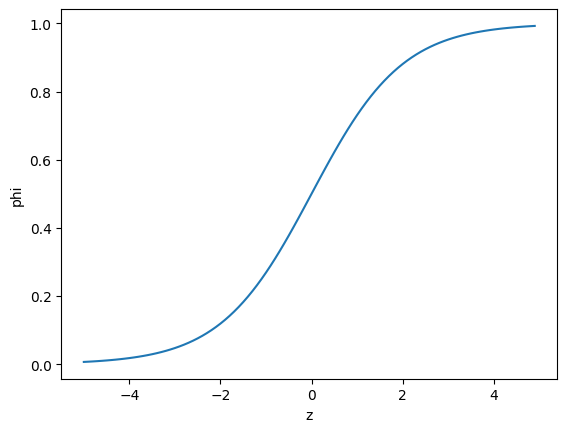

In [265]:
#시그모이드 함수
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi =1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [266]:
char_arr =np.array(['A','B','C','D','E'])

In [267]:
char_arr

array(['A', 'B', 'C', 'D', 'E'], dtype='<U1')

In [268]:
char_arr[[True,False,True,False,False]]

array(['A', 'C'], dtype='<U1')

In [269]:
#이진분류 문제로 바꾸기
bream_smelt_indexs =(train_target == 'Bream') |(train_target == 'Smelt')
# 도미 이거나(True) ,빙어(True)인덱스

In [270]:
train_bream_smelt =train_scaled[bream_smelt_indexs]
target_bream_smelt = train_target[bream_smelt_indexs]

In [271]:
#로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [272]:
lr.predict(train_bream_smelt[:5])

array(['Smelt', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [273]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.03033262, 0.96966738],
       [0.03173596, 0.96826404],
       [0.97826222, 0.02173778],
       [0.99783689, 0.00216311],
       [0.85264095, 0.14735905]])

In [274]:
lr.coef_
#모델의 계수가 반환

array([[-0.50937327, -0.74302352, -0.84489549, -0.84489549, -0.89827574]])

In [275]:
lr.intercept_

array([-2.25215689])

In [276]:
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([ 3.46472934,  3.41805449, -3.80672587, -6.13404223, -1.75546637])

In [277]:
from scipy.special import expit
expit(decisions)

array([0.96966738, 0.96826404, 0.02173778, 0.00216311, 0.14735905])

In [278]:
#로지스틱 함수 이용해 다중분류 문제 해결하기
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [279]:
lr.score(train_scaled, train_target)

0.8823529411764706

In [280]:
lr.predict(test_scaled[:5])

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Pike'], dtype=object)

In [281]:
lr.predict_proba(test_scaled[:5])

array([[9.11731090e-01, 3.74761742e-02, 3.36121511e-03, 3.51559225e-02,
        1.84706752e-03, 1.02580048e-06, 1.04275051e-02],
       [7.79730924e-01, 7.24465697e-02, 1.99674342e-02, 1.69111530e-02,
        6.14822310e-02, 5.45953290e-06, 4.94562284e-02],
       [1.55023783e-05, 3.28011622e-02, 5.91960861e-03, 4.67582378e-08,
        5.21903840e-04, 9.60708711e-01, 3.30649581e-05],
       [6.59803414e-01, 4.13860987e-02, 7.08398239e-02, 1.81296808e-03,
        1.93591476e-02, 3.18401526e-08, 2.06798516e-01],
       [3.11504968e-01, 5.61710123e-03, 6.78169064e-04, 6.68213142e-01,
        1.24816697e-02, 8.97453201e-06, 1.49597533e-03]])

In [282]:
#z값 최종값
decision =lr.decision_function(test_scaled[:5])
decision

array([[  5.20292932,   2.01128961,  -0.40011322,   1.94737733,
         -0.99881651,  -8.49469779,   0.73203127],
       [  3.86276055,   1.48666098,   0.19791432,   0.031785  ,
          1.32255987,  -8.00658038,   1.10489966],
       [ -3.30098618,   4.3562396 ,   2.64404598,  -9.10474446,
          0.21550373,   7.7334469 ,  -2.54350558],
       [  4.63331318,   1.86431629,   2.40179258,  -1.26366342,
          1.1045363 , -12.21341115,   3.47311622],
       [  4.05610749,   0.04050794,  -2.07366646,   4.8192994 ,
          0.83895334,  -6.39867229,  -1.28252941]])

In [283]:
#소프트맥스
from scipy.special import softmax
proda = softmax(decision, axis=1)

In [284]:
proda

array([[9.11731090e-01, 3.74761742e-02, 3.36121511e-03, 3.51559225e-02,
        1.84706752e-03, 1.02580048e-06, 1.04275051e-02],
       [7.79730924e-01, 7.24465697e-02, 1.99674342e-02, 1.69111530e-02,
        6.14822310e-02, 5.45953290e-06, 4.94562284e-02],
       [1.55023783e-05, 3.28011622e-02, 5.91960861e-03, 4.67582378e-08,
        5.21903840e-04, 9.60708711e-01, 3.30649581e-05],
       [6.59803414e-01, 4.13860987e-02, 7.08398239e-02, 1.81296808e-03,
        1.93591476e-02, 3.18401526e-08, 2.06798516e-01],
       [3.11504968e-01, 5.61710123e-03, 6.78169064e-04, 6.68213142e-01,
        1.24816697e-02, 8.97453201e-06, 1.49597533e-03]])

In [285]:
np.round(proda,decimals=3)
#소수점 세자리까지 나오게

array([[0.912, 0.037, 0.003, 0.035, 0.002, 0.   , 0.01 ],
       [0.78 , 0.072, 0.02 , 0.017, 0.061, 0.   , 0.049],
       [0.   , 0.033, 0.006, 0.   , 0.001, 0.961, 0.   ],
       [0.66 , 0.041, 0.071, 0.002, 0.019, 0.   , 0.207],
       [0.312, 0.006, 0.001, 0.668, 0.012, 0.   , 0.001]])

In [286]:
# 드라이브 마운트
import os,sys
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [287]:
!pip install kaggle
from google.colab import files
files.upload()
#파일 업로드 메서드

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ironkey","key":"f026eb39e46623b87d090ae45c5438b7"}'}

In [288]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chamod 600 ~/.kaggle/kaggle.json
#파일 셋팅값변경

/bin/bash: line 1: chamod: command not found


In [289]:
import os

# 디렉토리 생성
directory = '/content/drive/MyDrive/Colab Notebooks/dataset/'
os.makedirs(directory, exist_ok=True)

In [290]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/dirve/MyDrive/Colab Notebooks/dataset/.kaggle"

In [291]:
!cp kaggle.json "/content/dirve/MyDrive/Colab Notebooks/dataset/.kaggle"

cp: cannot create regular file '/content/dirve/MyDrive/Colab Notebooks/dataset/.kaggle': No such file or directory


In [292]:
cd /content/drive/MyDrive/Colab Notebooks/dataset/

/content/drive/MyDrive/Colab Notebooks/dataset


In [293]:
!ls

'kaggle (1).json'
'kaggle (2).json'
 kaggle.json
'League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv'


In [294]:
lol_worlds_data = pd.read_csv('League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')

In [295]:
lol_worlds_data.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L


In [296]:
len(lol_worlds_data)

220

In [297]:
# 2021년도 원시데이터
is_adc = lol_worlds_data['Position'] == 'Adc'
is_support = lol_worlds_data['Position'] == 'Support'
adc_support = lol_worlds_data[is_adc | is_support]


In [298]:
adc_support['KPA'] = adc_support['Kills'] / (adc_support['Assists'] + 1)
adc_support['WPG'] = adc_support['Wards Placed'] / (adc_support['Gold Earned'] + 1000)

<ipython-input-298-6ed77bc66c99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adc_support['KPA'] = adc_support['Kills'] / (adc_support['Assists'] + 1)
<ipython-input-298-6ed77bc66c99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adc_support['WPG'] = adc_support['Wards Placed'] / (adc_support['Gold Earned'] + 1000)


In [299]:
adc_support.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,...,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result,KPA,WPG
6,UOL,Argonavt,GS,Adc,Ezreal,1,5,3,202,9539,...,7,2,9,0,4,0,1,L,0.25,0.000664
7,GS,Alive,UOL,Adc,Miss Fortune,9,2,5,273,15085,...,15,5,20,4,0,1,0,W,1.50,0.000933
8,UOL,Santas,GS,Support,Amumu,1,6,4,41,6328,...,40,10,50,0,4,0,1,L,0.20,0.005459
9,GS,Zergsting,UOL,Support,Rakan,0,2,16,42,7395,...,36,6,42,4,0,1,0,W,0.00,0.004288
16,DFM,Yutapon,C9,Adc,Jhin,1,0,1,303,11579,...,8,3,11,0,4,0,1,L,0.50,0.000636


In [300]:
len(adc_support)

88

In [301]:
train_data = adc_support[['KPA', 'WPG', 'Champion Damage Share']].to_numpy()
target_data = adc_support['Position'].to_numpy()

In [302]:
len(train_data)

88

In [303]:
# 학습, 테스트 데이터로 나누기 train_test_split 활용 random_state=42
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_data, target_data, random_state=42)

In [304]:
# 표준점수 정규화 StandardScaler
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
ss = StandardScaler()

# 학습 데이터에 대해 fit과 transform을 각각 수행
ss.fit(train_input)
train_scaled = ss.transform(train_input)

# 테스트 데이터에 대해 fit_transform 수행
test_scaled = ss.transform(test_input)


In [305]:
# 로지스틱 모델 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, max_iter=100)
lr.fit(train_scaled,train_target)
# 모델선언 ,파라미터 C =0.01, MAX_iter=100
# 모델학습 스케일링된 데이터
# 모델스코어 점수 확인 train,test
# 모델 선언 및 학습


LogisticRegression(C=0.01)

In [306]:
lr.score(train_scaled, train_target)

0.9393939393939394

In [307]:
lr.score(test_scaled,test_target)

0.9545454545454546

In [308]:
import matplotlib.pyplot as pllt
train_score =[]
test_score= []

In [309]:
lr.score(test_scaled, test_target)

0.9545454545454546

In [310]:
# 모델 선언 c값만 변경
# 모델 학습


c_lst = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for c in c_lst:
    lr = LogisticRegression(C=c, max_iter=100)
    lr.fit(train_scaled, train_target)
    score_train = lr.score(train_scaled, train_target)
    train_score.append(score_train)
    score_test = lr.score(test_scaled, test_target)
    test_score.append(score_test)






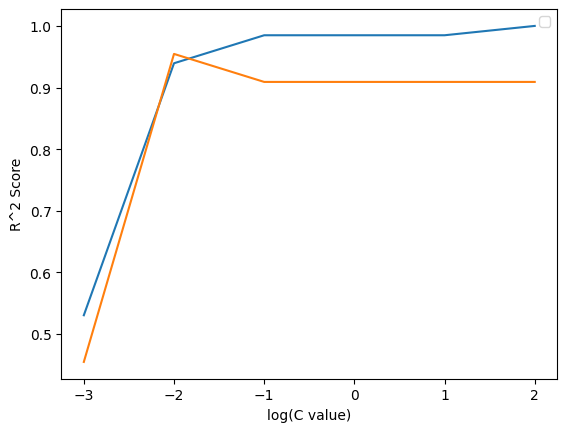

In [311]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.log10(c_lst), train_score)
plt.plot(np.log10(c_lst), test_score)
plt.xlabel('log(C value)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()
#주황색이 test값 0.01

In [312]:
# 확률적 경사 하강법
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [313]:
fish_input = fish[['Weight','Length','Diagonal','Diagonal','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [314]:
# 학습,테스트 데이터 나누기  train_test_split randon_state= 42

In [315]:
from sklearn.model_selection import train_test_split
#데이터 분할
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [316]:
# 확률적 경사 하강법 모델
from sklearn.linear_model import SGDClassifier
ss = StandardScaler()

# 훈련 데이터 스케일링
train_scaled = ss.fit_transform(train_input)

# 모델 생성 및 훈련
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_scaled, train_target)

# 테스트 데이터 스케일링
test_scaled = ss.transform(test_input)

# 모델 평가
accuracy = sgd_clf.score(test_scaled, test_target)
print("테스트 세트 정확도: {:.2f}%".format(accuracy * 100))

테스트 세트 정확도: 75.00%


In [317]:
# 데이터 전처리: 훈련 데이터 스케일링
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)

# 나머지 코드는 이전과 동일
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [318]:
sc.score(train_scaled, train_target)

0.8235294117647058

In [319]:
sc.score=(train_scaled, train_target)

In [320]:
# 적절한 max_iter(opoch)찾기
import numpy as np

In [321]:
sc = SGDClassifier(loss='log',random_state=42)
train_score =[]
test_score =[]
classes = np.unique(train_target)

In [322]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [323]:
train_score = []
test_score = []

for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    score_train = sc.score(train_scaled, train_target)
    train_score.append(score_train)
    score_test = sc.score(test_scaled, test_target)
    test_score.append(score_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


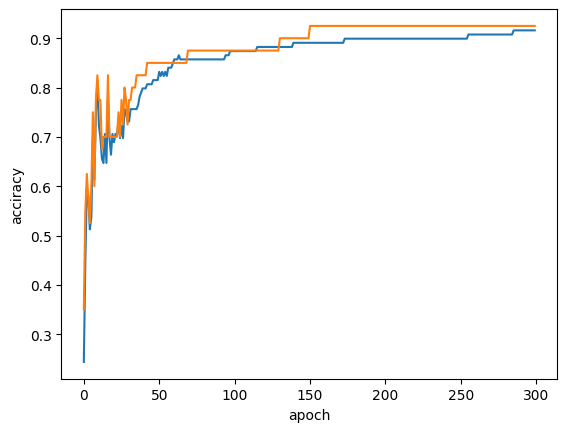

In [324]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('apoch')
plt.ylabel('acciracy')
plt.show()

In [342]:
sc = SGDClassifier(loss='log',max_iter=100, random_state=42)
sc.fit(train_scaled,train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [343]:
sc.score(train_scaled,train_target)

1.0

In [344]:
sc.score(test_scaled,test_target)

0.9090909090909091

In [346]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled,train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [329]:
#롤데이터

In [347]:
lol_worlds_data = pd.read_csv('League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')

In [348]:
lol_worlds_data

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


In [349]:
is_adc = lol_worlds_data['Position'] == 'Adc'
is_support = lol_worlds_data['Position'] == 'Support'
adc_support = lol_worlds_data[is_adc | is_support]

In [350]:
adc_support['KPA'] = adc_support['Kills'] / (adc_support['Assists'] + 1)
adc_support['WPG'] = adc_support['Wards Placed'] / (adc_support['Gold Earned'] + 1000)

<ipython-input-350-6ed77bc66c99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adc_support['KPA'] = adc_support['Kills'] / (adc_support['Assists'] + 1)
<ipython-input-350-6ed77bc66c99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adc_support['WPG'] = adc_support['Wards Placed'] / (adc_support['Gold Earned'] + 1000)


In [352]:
#학습데이터 나누기 random_state=42
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(train_data,target_data,random_state=42)

In [353]:
#표준점수 정규화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled =ss.transform(test_input)

In [354]:
train_input

array([[0.00000000e+00, 1.13812726e-03, 2.30000000e-01],
       [1.50000000e+00, 1.35341885e-03, 4.30000000e-01],
       [1.50000000e+00, 8.92743273e-04, 4.10000000e-01],
       [1.11111111e-01, 4.67631156e-03, 6.00000000e-02],
       [4.28571429e-01, 9.19052669e-04, 2.20000000e-01],
       [0.00000000e+00, 5.17961571e-03, 7.00000000e-02],
       [1.42857143e-01, 8.34088849e-03, 5.00000000e-02],
       [0.00000000e+00, 5.78120368e-03, 6.00000000e-02],
       [1.50000000e+00, 7.28579755e-04, 3.30000000e-01],
       [8.75000000e-01, 8.46405598e-04, 3.60000000e-01],
       [5.71428571e-01, 9.46193150e-04, 4.30000000e-01],
       [2.00000000e+00, 6.41025641e-03, 1.10000000e-01],
       [0.00000000e+00, 6.71227572e-03, 7.00000000e-02],
       [1.00000000e-01, 5.88094095e-03, 9.00000000e-02],
       [2.25000000e+00, 9.89315394e-04, 2.60000000e-01],
       [6.66666667e-01, 1.15052733e-03, 2.80000000e-01],
       [0.00000000e+00, 6.58540003e-03, 6.00000000e-02],
       [7.27272727e-01, 8.63744

In [355]:
train_target

array(['Adc', 'Adc', 'Adc', 'Support', 'Adc', 'Support', 'Support',
       'Support', 'Adc', 'Adc', 'Adc', 'Support', 'Support', 'Support',
       'Adc', 'Adc', 'Support', 'Adc', 'Adc', 'Support', 'Adc', 'Adc',
       'Support', 'Adc', 'Support', 'Adc', 'Adc', 'Support', 'Adc', 'Adc',
       'Support', 'Support', 'Support', 'Support', 'Support', 'Support',
       'Support', 'Support', 'Support', 'Support', 'Adc', 'Support',
       'Support', 'Adc', 'Adc', 'Adc', 'Adc', 'Support', 'Support',
       'Support', 'Support', 'Adc', 'Adc', 'Adc', 'Adc', 'Adc', 'Support',
       'Support', 'Adc', 'Support', 'Support', 'Adc', 'Adc', 'Support',
       'Support', 'Support'], dtype=object)

In [357]:
sc=SGDClassifier(loss='hinge',random_state=42)
train_score = []
test_score = []
classes=np.unique(train_target)
for _ in range(30):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  score_train=sc.score(train_scaled,train_target)
  train_score.append(score_train)
  score_test=sc.score(test_scaled,test_target)
  test_score.append(score_test)

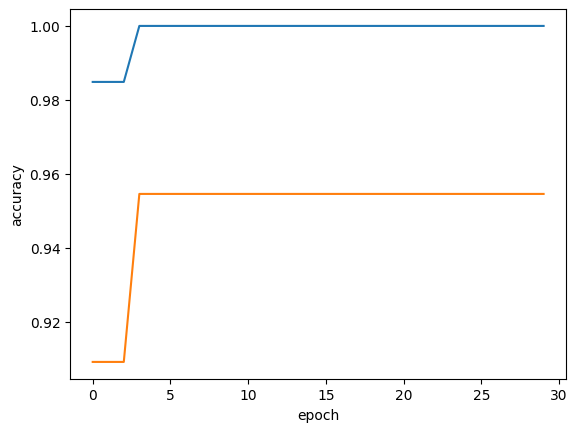

In [358]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [359]:
sc.partial_fit(train_scaled, train_target, classes=classes)
score_train = sc.score(train_scaled, train_target)
train_score.append(score_train)
score_test = sc.score(test_scaled, test_target)
test_score.append(score_test)

In [360]:
train_score

[0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]